# KNN for Diabetes

## Bài tập: Hãy xây dựng KNN model để dự đoán xem một bệnh nhân mắc bệnh (diabetes) hay không.  

#### Trong bài này ta sử dụng tập dataset : diabetes.csv 

### Tran Ngoc Dat - 2570388

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
# Get the number of rows - instances and the number of columns - attributes
dataset.shape

(768, 9)

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Summary the data in all of column
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Show 10 first rows data
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
#  Show 10 last rows data
dataset.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# Get the number of instances - rows that belong to 'Pregnancies' class
dataset.groupby('Pregnancies').size()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

In [9]:
# Get the number of instances - rows that belong to 'Glucose' class
dataset.groupby('Glucose').size()

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Length: 136, dtype: int64

In [10]:
# Get the number of instances - rows that belong to 'BloodPressure' class
dataset.groupby('BloodPressure').size()

BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
dtype: int64

In [11]:
# Get the number of instances - rows that belong to 'SkinThickness' class
dataset.groupby('SkinThickness').size()

SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
dtype: int64

In [12]:
# Get the number of instances - rows that belong to 'Insulin' class
dataset.groupby('Insulin').size()

Insulin
0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Length: 186, dtype: int64

In [13]:
# Get the number of instances - rows that belong to 'BMI' class
dataset.groupby('BMI').size()

BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Length: 248, dtype: int64

In [14]:
# Get the number of instances - rows that belong to 'DiabetesPedigreeFunction' class
dataset.groupby('DiabetesPedigreeFunction').size()

DiabetesPedigreeFunction
0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Length: 517, dtype: int64

In [15]:
# Get the number of instances - rows that belong to 'Age' class
dataset.groupby('Age').size()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64

In [16]:
#!pip install seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dùng để hiển thị biểu đồ trực tiếp ngay trong notebook
%matplotlib inline

<Figure size 640x480 with 0 Axes>

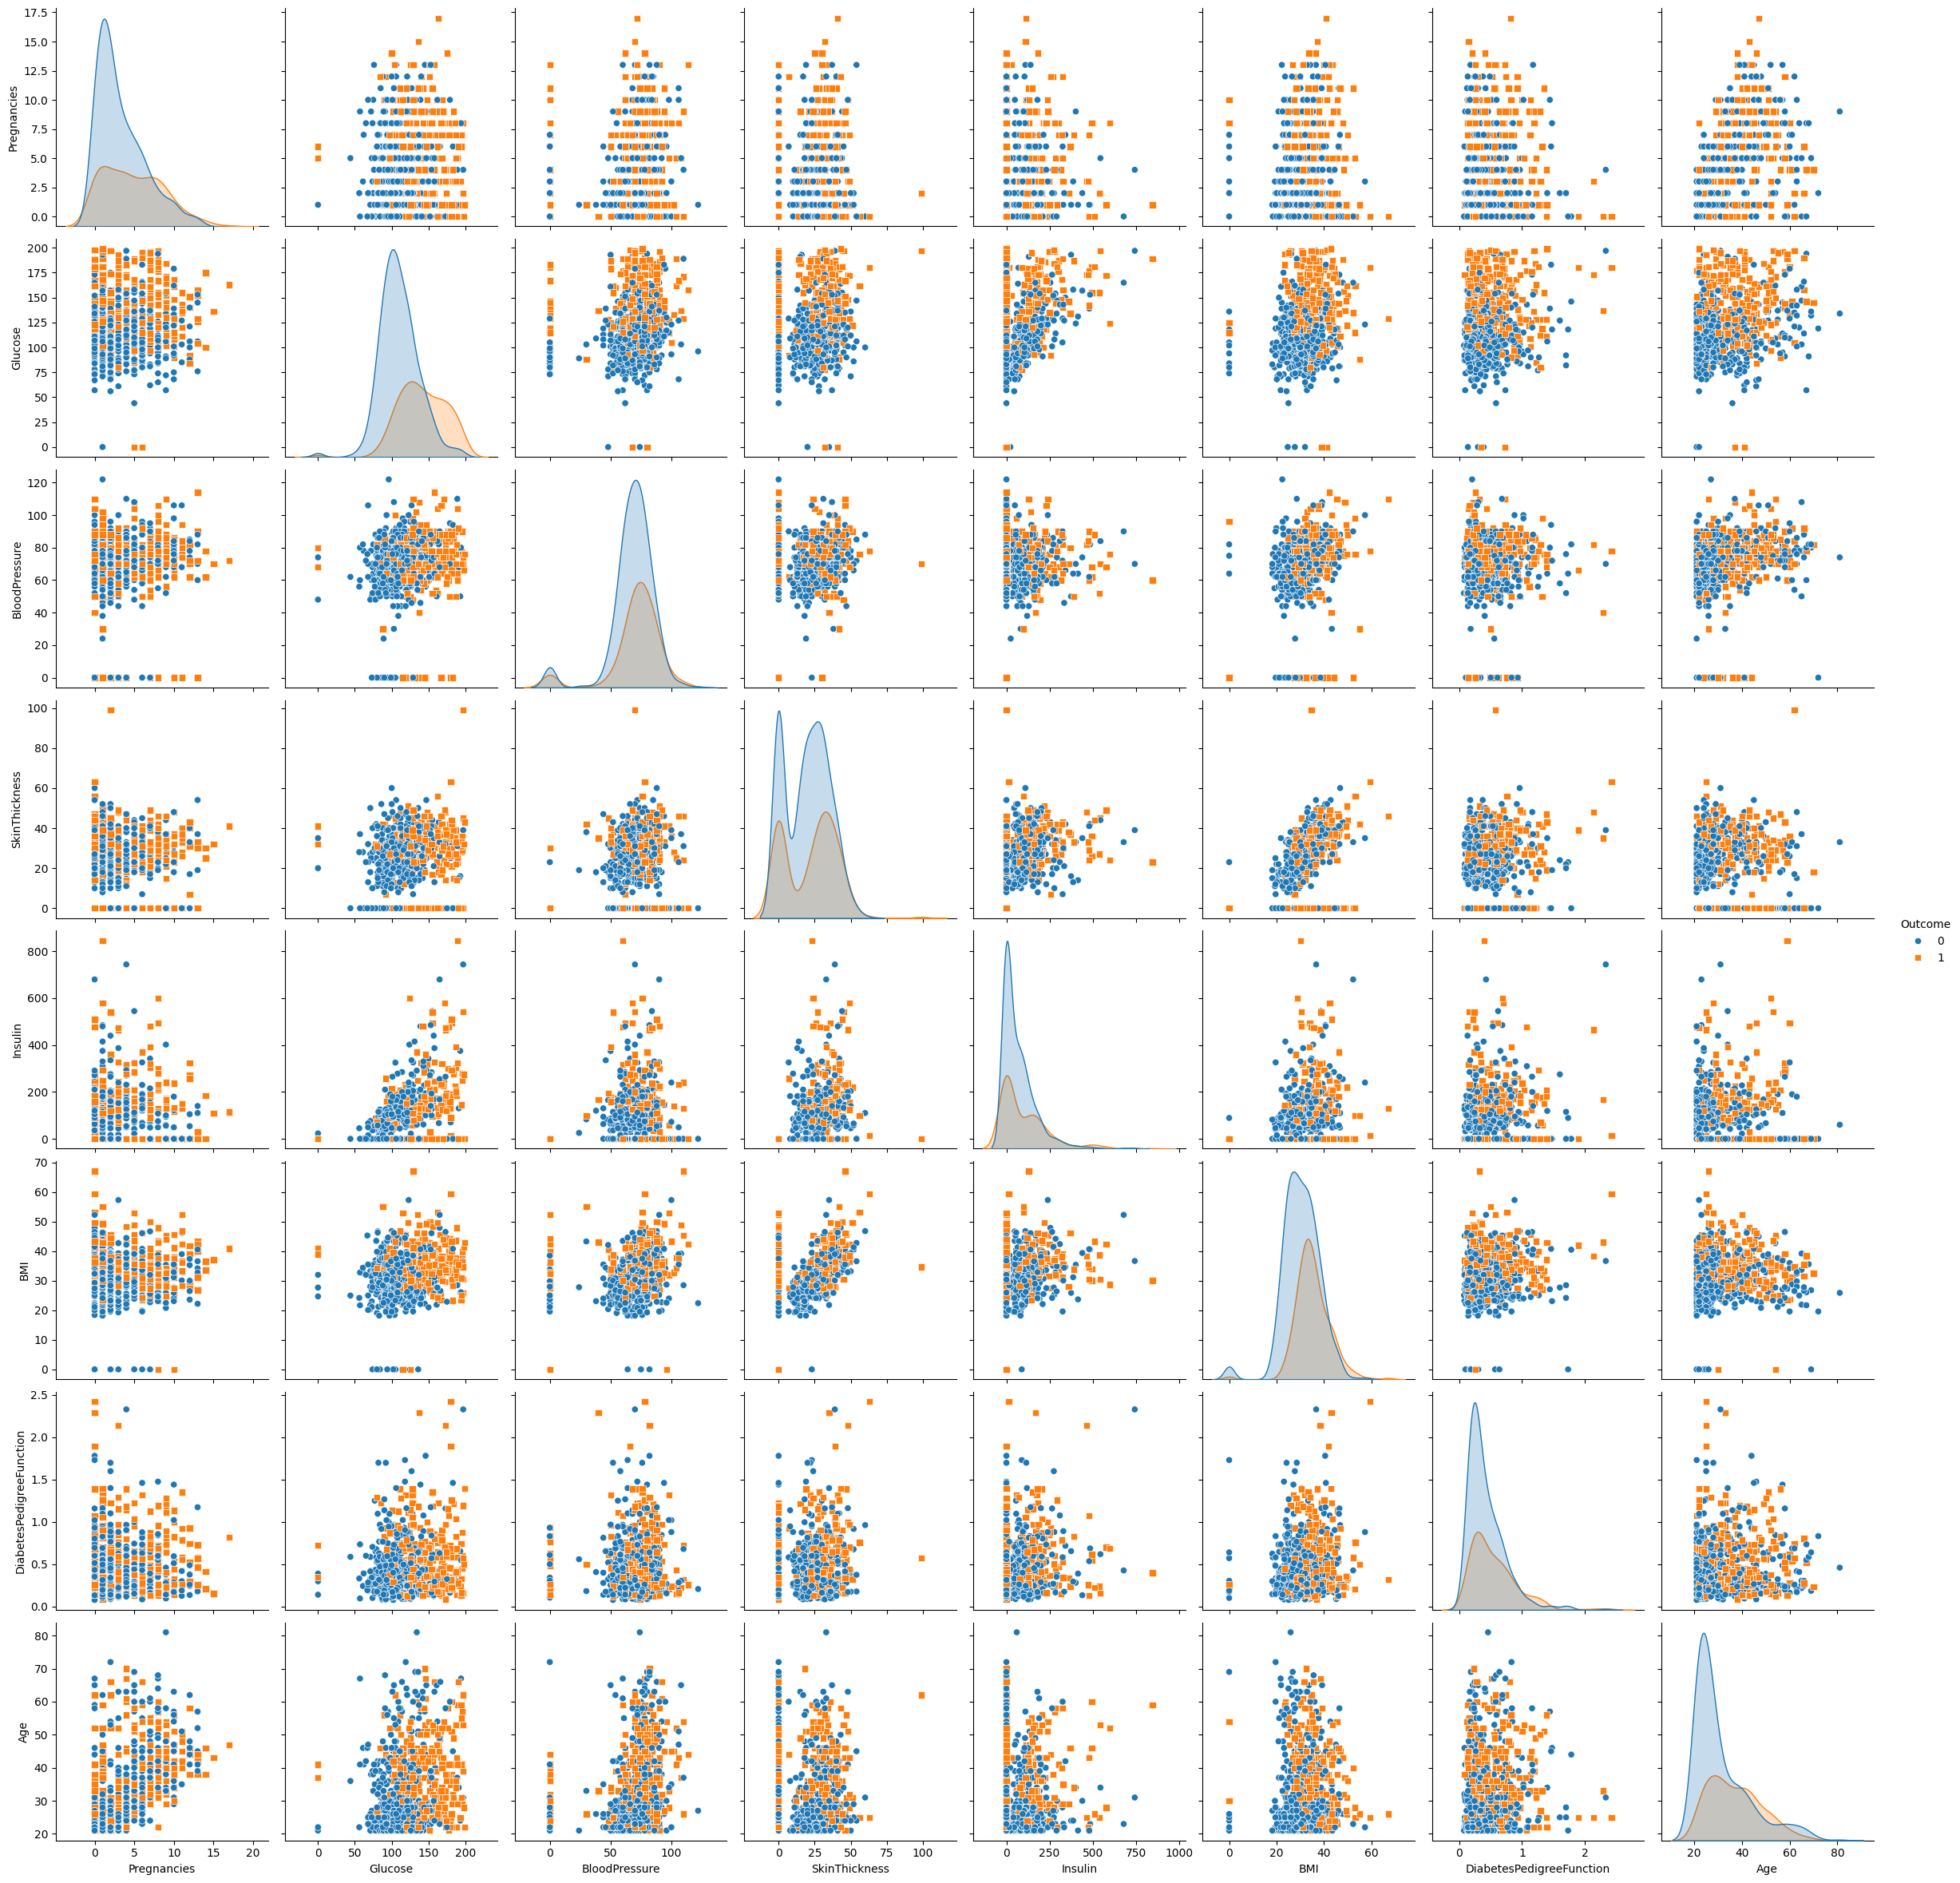

In [18]:
# Tạo một Figure (Khung hình vẽ mới)
plt.figure()
sns.pairplot(dataset, hue = "Outcome", height=3, markers=["o", "s"])
plt.show()

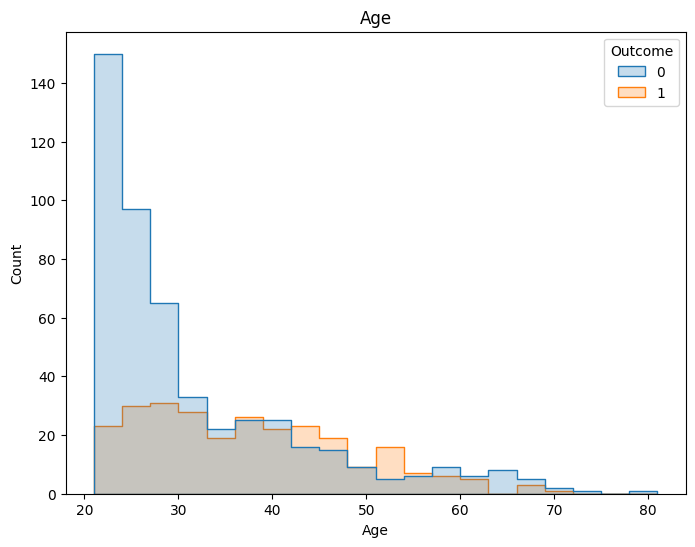

In [19]:
# Phân phối Age theo Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', hue='Outcome', element='step', bins=20)
plt.title("Age")
plt.show()

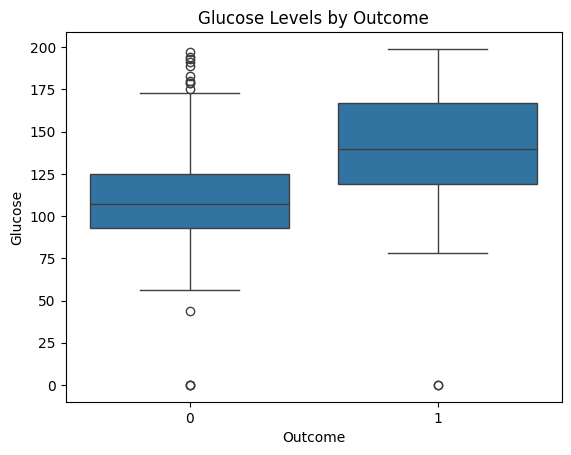

In [20]:
plt.figure()
sns.boxplot(data=dataset, x='Outcome', y='Glucose')
plt.title("Glucose Levels by Outcome")
plt.show()

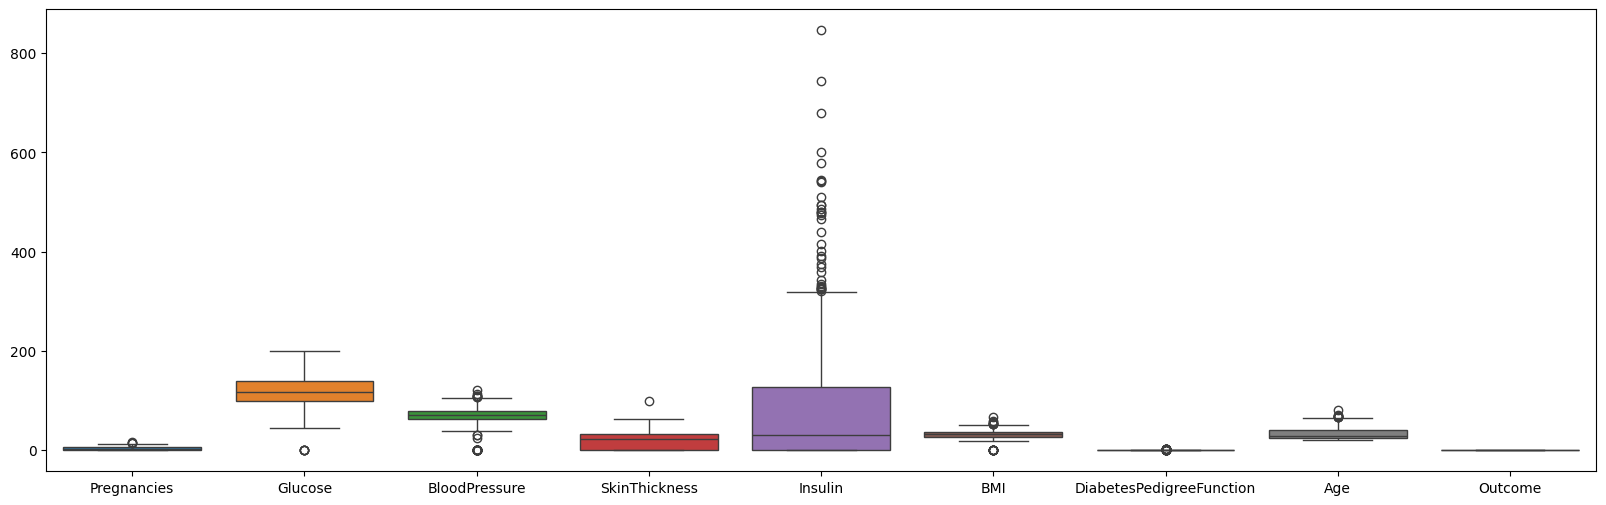

In [21]:
# Mô tả phân bố dữ liệu, phát hiện outlier.
plt.figure(figsize = (20, 6))
sns.boxplot(data = dataset, width = 0.8)
plt.show()

### Loại bỏ "outlier" bằng phương pháp IQR

In [22]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_factor = 1.5

outliers = ((dataset < (Q1 - outlier_threshold_factor * IQR)) | (dataset > (Q3 + outlier_threshold_factor * IQR)))

columns_with_outliers = outliers.any()

In [23]:
dataset_no_outliers = dataset[~outliers.any(axis=1)]

dataset = dataset[~outliers.any(axis=1)]

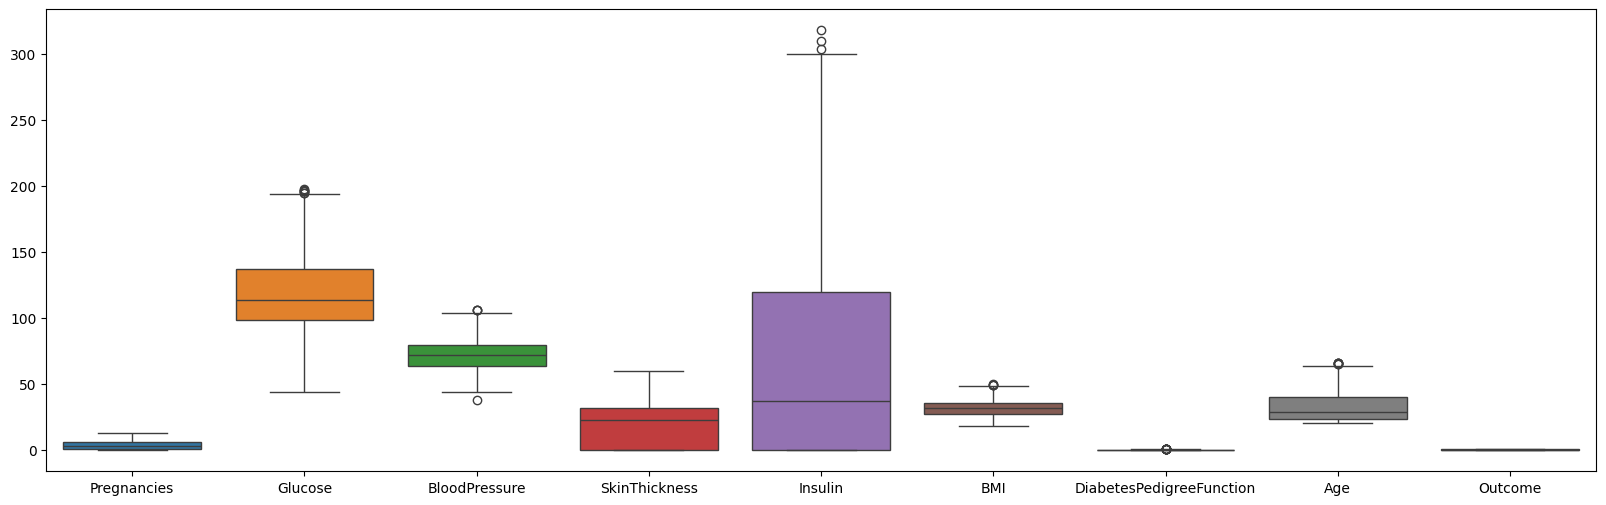

In [24]:
plt.figure(figsize = (20, 6))
sns.boxplot(data = dataset, width = 0.8)
plt.show()

### Chuẩn hóa, xử lý dữ liệu và tìm giá trị K tốt nhất cho mô hình KNN

In [25]:
X = dataset.drop('Outcome',axis=1).values
y = dataset['Outcome'].values

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized = scaler.fit_transform(X)
X_normalized
# Min-Max Normalization

array([[0.46153846, 0.67532468, 0.5       , ..., 0.48427673, 0.49326146,
        0.64444444],
       [0.07692308, 0.26623377, 0.41176471, ..., 0.26415094, 0.24528302,
        0.22222222],
       [0.61538462, 0.9025974 , 0.38235294, ..., 0.16037736, 0.53369272,
        0.24444444],
       ...,
       [0.38461538, 0.5       , 0.5       , ..., 0.25157233, 0.15004492,
        0.2       ],
       [0.07692308, 0.53246753, 0.32352941, ..., 0.37421384, 0.24348607,
        0.57777778],
       [0.07692308, 0.31818182, 0.47058824, ..., 0.3836478 , 0.21293801,
        0.04444444]], shape=(639, 8))

In [28]:
scaler_z = StandardScaler()
X_normalized_z = X.copy()
X_normalized_z = scaler_z.fit_transform(X)
X_normalized_z
# Sử dụng chuẩn hóa Z_Score normalization cho kết quả chính xác hơn

array([[ 0.67382449,  0.99135111, -0.01062636, ...,  0.24797421,
         0.7888924 ,  1.56113222],
       [-0.86065109, -1.170674  , -0.53973612, ..., -0.84085334,
        -0.31175881, -0.15491181],
       [ 1.28761472,  2.19247617, -0.71610604, ..., -1.35415776,
         0.96834641, -0.0645937 ],
       ...,
       [ 0.36692937,  0.06476892, -0.01062636, ..., -0.90307206,
        -0.73447269, -0.24522991],
       [-0.86065109,  0.23635821, -1.06884588, ..., -0.29643957,
        -0.31973455,  1.2901779 ],
       [-0.86065109, -0.89613113, -0.18699628, ..., -0.24977553,
        -0.45532202, -0.87745666]], shape=(639, 8))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_normalized_z,y,test_size=0.3,random_state=666)

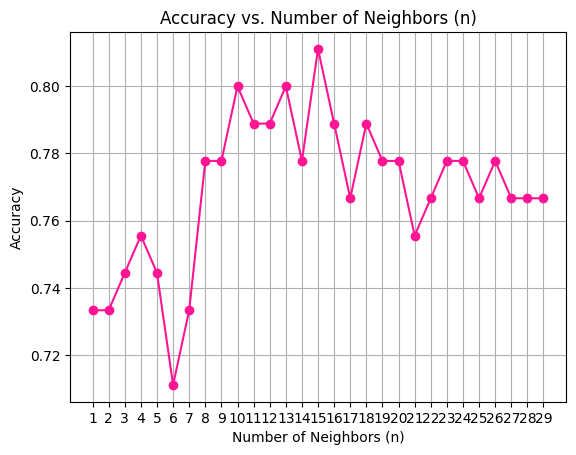

In [31]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

n_values = list(range(1, 30))
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_sub, y_train_sub)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracies.append(accuracy)

best_n = n_values[np.argmax(accuracies)]

plt.figure()
plt.plot(n_values, accuracies, marker='o',color = "deeppink")
plt.title("Accuracy vs. Number of Neighbors (n)")
plt.xlabel("Number of Neighbors (n)")
plt.ylabel("Accuracy")
plt.xticks(n_values)
plt.grid(True)
plt.show()

### Xây dựng mô hình KNN

In [32]:
# Create a KNN classifier with the best value of n
knn_best = KNeighborsClassifier(n_neighbors=best_n)

# Train the classifier on the entire training set
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_best.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(test_accuracy)

0.796875


In [33]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [34]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
cm = confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       136
           1       0.76      0.45      0.56        56

    accuracy                           0.80       192
   macro avg       0.78      0.69      0.71       192
weighted avg       0.79      0.80      0.78       192

